In [1]:
import pandas as pd

data = pd.read_csv('1Test1.csv')

In [2]:
data.head()

,Date,NO2,SO2,Humidity,Temperature,Latitude,Longitude
0,2019_01_01,0.000109,-0.000190,47.700001,288.255788,22.7948,86.1978
1,2019_01_02,0.000527,0.000322,44.661888,289.381955,22.7948,86.1978
2,2019_01_03,0.000430,0.000311,45.108860,289.490472,22.7948,86.1978
3,2019_01_04,0.000093,0.000505,41.166107,289.419129,22.7948,86.1978
4,2019_01_05,0.000115,0.001013,41.292675,289.919706,22.7948,86.1978


In [3]:
data['NO2'].fillna(data['NO2'].mean(), inplace=True)
data['SO2'].fillna(data['SO2'].mean(), inplace=True)
data['Humidity'].fillna(data['Humidity'].mean(), inplace=True)

data['Date'] = pd.to_datetime(data['Date'], format='%Y_%m_%d')

missing_values_after_imputation = data.isnull().sum()
print(missing_values_after_imputation)

Date           0
NO2            0
SO2            0
Humidity       0
Temperature    0
Latitude       0
Longitude      0
dtype: int64


In [4]:
# Summary statistics for numerical columns
summary_stats = data.describe()
print(summary_stats)


                      Date          NO2          SO2     Humidity  \
count                 1826  1826.000000  1826.000000  1826.000000   
mean   2021-07-01 12:00:00     0.000155     0.000369    65.470860   
min    2019-01-01 00:00:00     0.000007    -0.000934    10.800000   
25%    2020-04-01 06:00:00     0.000104     0.000217    49.625002   
50%    2021-07-01 12:00:00     0.000155     0.000369    66.450001   
75%    2022-09-30 18:00:00     0.000155     0.000404    84.500000   
max    2023-12-31 00:00:00     0.001071     0.003610    98.500000   
std                    NaN     0.000090     0.000431    20.792602   

       Temperature      Latitude     Longitude  
count  1826.000000  1.826000e+03  1.826000e+03  
mean    298.790860  2.279480e+01  8.619780e+01  
min     286.410988  2.279480e+01  8.619780e+01  
25%     295.490193  2.279480e+01  8.619780e+01  
50%     299.779713  2.279480e+01  8.619780e+01  
75%     301.832097  2.279480e+01  8.619780e+01  
max     309.660662  2.279480e+01  8

In [6]:
data.to_csv('updateddata.csv', index=False)

In [7]:
data = pd.read_csv('updateddata.csv')

In [32]:
data

,Date,NO2,SO2,Humidity,Temperature,Latitude,Longitude
0,2019-01-01,0.000109,-0.000190,47.700001,288.255788,22.7948,86.1978
1,2019-01-02,0.000527,0.000322,44.661888,289.381955,22.7948,86.1978
2,2019-01-03,0.000430,0.000311,45.108860,289.490472,22.7948,86.1978
3,2019-01-04,0.000093,0.000505,41.166107,289.419129,22.7948,86.1978
4,2019-01-05,0.000115,0.001013,41.292675,289.919706,22.7948,86.1978
...,...,...,...,...,...,...,...
1821,2023-12-27,0.000155,0.000369,63.000000,292.718290,22.7948,86.1978
1822,2023-12-28,0.000155,-0.000228,60.000000,292.304670,22.7948,86.1978
1823,2023-12-29,0.000080,0.000907,64.700005,292.183188,22.7948,86.1978
1824,2023-12-30,0.000268,-0.000224,69.099998,291.585001,22.7948,86.1978


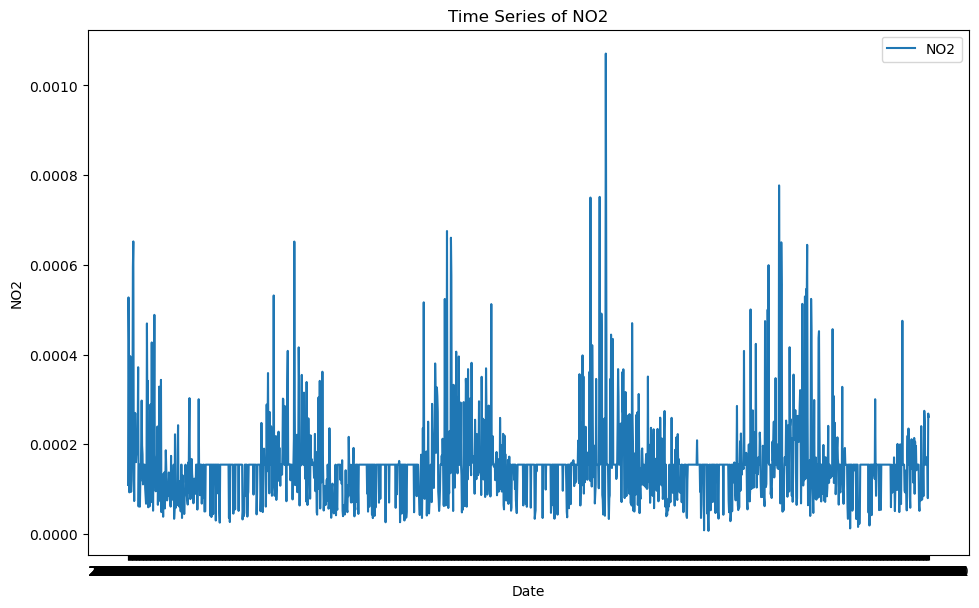

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(25, 15))

plt.subplot(2, 2, 1)
plt.plot(data['Date'], data['NO2'], label='NO2')
plt.xlabel('Date')
plt.ylabel('NO2')
plt.title('Time Series of NO2')
plt.legend()


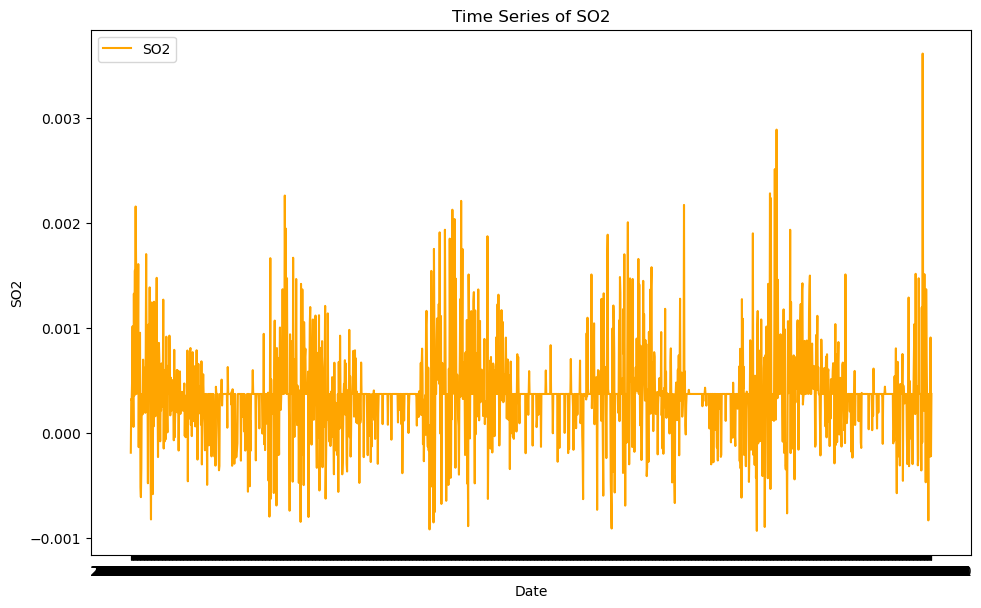

In [17]:
plt.figure(figsize=(25, 15))
plt.subplot(2, 2, 2)
plt.plot(data['Date'], data['SO2'], label='SO2', color='orange')
plt.xlabel('Date')
plt.ylabel('SO2')
plt.title('Time Series of SO2')
plt.legend()

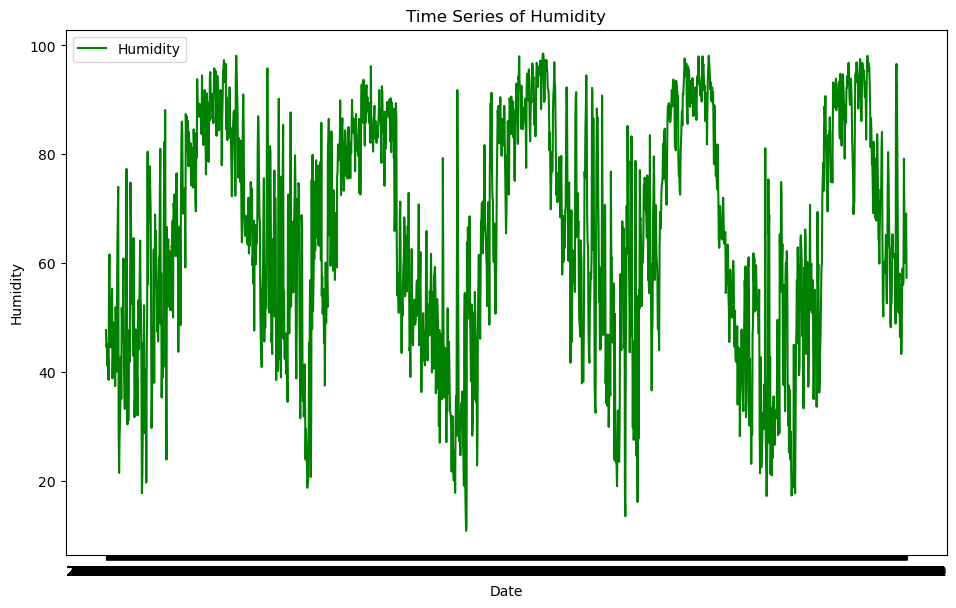

In [19]:
plt.figure(figsize=(25, 15))
plt.subplot(2, 2, 3)
plt.plot(data['Date'], data['Humidity'], label='Humidity', color='green')
plt.xlabel('Date')
plt.ylabel('Humidity')
plt.title('Time Series of Humidity')
plt.legend()

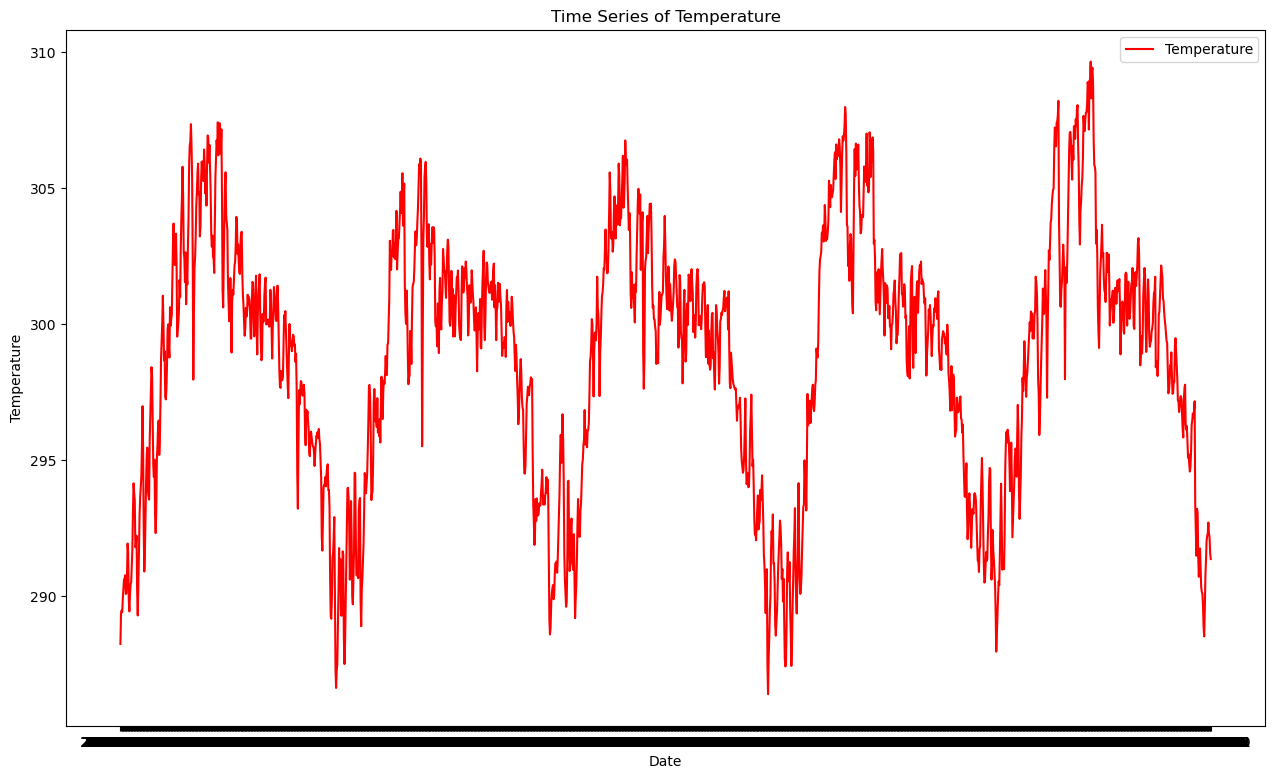

In [20]:
plt.figure(figsize=(25, 15))
plt.subplot(2, 2, 4)
plt.plot(data['Date'], data['Temperature'], label='Temperature', color='red')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Time Series of Temperature')
plt.legend()

plt.tight_layout()
plt.show()

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Define feature and target variables
X = data[['Temperature', 'Humidity']]
y_NO2 = data['NO2']
y_SO2 = data['SO2']

# Split the data into training and testing sets
X_train, X_test, y_NO2_train, y_NO2_test = train_test_split(X, y_NO2, test_size=0.2, random_state=42)
_, _, y_SO2_train, y_SO2_test = train_test_split(X, y_SO2, test_size=0.2, random_state=42)

# Train Linear Regression model for NO2
model_NO2 = LinearRegression()
model_NO2.fit(X_train, y_NO2_train)

# Predict NO2
y_NO2_pred = model_NO2.predict(X_test)

# Evaluate NO2 model
mse_NO2 = mean_squared_error(y_NO2_test, y_NO2_pred)
r2_NO2 = r2_score(y_NO2_test, y_NO2_pred)
print(f'NO2 Model - MSE: {mse_NO2}, R2: {r2_NO2}')

# Train Linear Regression model for SO2
model_SO2 = LinearRegression()
model_SO2.fit(X_train, y_SO2_train)

# Predict SO2
y_SO2_pred = model_SO2.predict(X_test)

# Evaluate SO2 model
mse_SO2 = mean_squared_error(y_SO2_test, y_SO2_pred)
r2_SO2 = r2_score(y_SO2_test, y_SO2_pred)
print(f'SO2 Model - MSE: {mse_SO2}, R2: {r2_SO2}')


NO2 Model - MSE: 7.92064716763578e-09, R2: 0.10390349406774524
SO2 Model - MSE: 2.1284083463972603e-07, R2: 0.04722071935859273


In [27]:
from sklearn.preprocessing import MinMaxScaler
# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data[['Temperature', 'Humidity', 'NO2', 'SO2']])

# Convert back to DataFrame
scaled_data = pd.DataFrame(scaled_data, columns=['Temperature', 'Humidity', 'NO2', 'SO2'])
scaled_data['Date'] = data['Date']
scaled_data.set_index('Date', inplace=True)

# Verify the columns
print(scaled_data.head())

            Temperature  Humidity       NO2       SO2
Date                                                 
2019-01-01     0.079347  0.420753  0.096185  0.163781
2019-01-02     0.127785  0.386110  0.489112  0.276410
2019-01-03     0.132453  0.391207  0.397380  0.274054
2019-01-04     0.129384  0.346250  0.080691  0.316727
2019-01-05     0.150915  0.347693  0.101430  0.428593


In [28]:
def create_sequences(data, target_column, sequence_length=30):
    sequences = []
    targets = []
    for i in range(len(data) - sequence_length):
        sequences.append(data.iloc[i:i+sequence_length].values)
        targets.append(data[target_column].iloc[i+sequence_length])
    return np.array(sequences), np.array(targets)

# Create sequences
sequence_length = 30
X_NO2, y_NO2 = create_sequences(scaled_data[['Temperature', 'Humidity']], 'NO2', sequence_length)
X_SO2, y_SO2 = create_sequences(scaled_data[['Temperature', 'Humidity']], 'SO2', sequence_length)

# Split data into training and testing sets
split_ratio = 0.8
split_idx_NO2 = int(len(X_NO2) * split_ratio)
split_idx_SO2 = int(len(X_SO2) * split_ratio)

X_NO2_train, X_NO2_test = X_NO2[:split_idx_NO2], X_NO2[split_idx_NO2:]
y_NO2_train, y_NO2_test = y_NO2[:split_idx_NO2], y_NO2[split_idx_NO2:]

X_SO2_train, X_SO2_test = X_SO2[:split_idx_SO2], X_SO2[split_idx_SO2:]
y_SO2_train, y_SO2_test = y_SO2[:split_idx_SO2], y_SO2[split_idx_SO2:]


KeyError: 'NO2'

In [34]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout


# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data[['Temperature', 'Humidity', 'NO2', 'SO2']])

# Convert back to DataFrame
scaled_data = pd.DataFrame(scaled_data, columns=['Temperature', 'Humidity', 'NO2', 'SO2'])
scaled_data['Date'] = data['Date']
scaled_data.set_index('Date', inplace=True)


In [35]:
def create_sequences(data, target_column, sequence_length=30):
    sequences = []
    targets = []
    for i in range(len(data) - sequence_length):
        sequences.append(data.iloc[i:i+sequence_length].values)
        targets.append(data[target_column].iloc[i+sequence_length])
    return np.array(sequences), np.array(targets)

# Create sequences
sequence_length = 30
X_NO2, y_NO2 = create_sequences(scaled_data[['Temperature', 'Humidity']], 'NO2', sequence_length)
X_SO2, y_SO2 = create_sequences(scaled_data[['Temperature', 'Humidity']], 'SO2', sequence_length)

# Split data into training and testing sets
split_ratio = 0.8
split_idx_NO2 = int(len(X_NO2) * split_ratio)
split_idx_SO2 = int(len(X_SO2) * split_ratio)

X_NO2_train, X_NO2_test = X_NO2[:split_idx_NO2], X_NO2[split_idx_NO2:]
y_NO2_train, y_NO2_test = y_NO2[:split_idx_NO2], y_NO2[split_idx_NO2:]

X_SO2_train, X_SO2_test = X_SO2[:split_idx_SO2], X_SO2[split_idx_SO2:]
y_SO2_train, y_SO2_test = y_SO2[:split_idx_SO2], y_SO2[split_idx_SO2:]


KeyError: 'NO2'

In [38]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load your data
data = pd.read_csv('updateddata.csv')

# Assume your data has columns: 'date', 'humidity', 'temperature', 'so2_concentration'
# Preprocess the data (e.g., normalize the features)
scaler = MinMaxScaler()
data[['Humidity', 'Temperature', 'SO2','NO2']] = scaler.fit_transform(data[['Humidity', 'Temperature', 'SO2','NO2']])

# Optionally, convert date to datetime format if not already
data['date'] = pd.to_datetime(data['Date'])

# Function to create sequences
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

# Define sequence length (5 days for training, 6th day for label)
seq_length = 5

# Create sequences (assuming 'humidity', 'temperature', 'so2_concentration' are in columns 1, 2, 3)
features = data[['Humidity', 'Temperature',  'SO2','NO2']].values
X, y = create_sequences(features, seq_length)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Define the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(seq_length, X_train.shape[2])))
model.add(LSTM(units=50))
model.add(Dense(units=X_train.shape[2]))  # Output layer with the same number of features

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

# Make predictions
predictions = model.predict(X_test)

# Inverse transform the predictions if you used a scaler
predictions = scaler.inverse_transform(predictions)

Epoch 1/20


C:\Users\kumar\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.1105 - val_loss: 0.0194
Epoch 2/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0152 - val_loss: 0.0127
Epoch 3/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0107 - val_loss: 0.0109
Epoch 4/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0097 - val_loss: 0.0108
Epoch 5/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0092 - val_loss: 0.0105
Epoch 6/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0098 - val_loss: 0.0103
Epoch 7/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0098 - val_loss: 0.0102
Epoch 8/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0092 - val_loss: 0.0102
Epoch 9/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0092 - val_loss: 0.0102
Epoch 10/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0093 - val_loss: 0.0100
Epoch 11/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0096 - val_loss: 0.0103
Epoch 12/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0089 - val_loss: 0.0098

Epoch 1/20


C:\Users\kumar\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0938 - val_loss: 0.0205
Epoch 2/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0150 - val_loss: 0.0137
Epoch 3/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0105 - val_loss: 0.0109
Epoch 4/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0096 - val_loss: 0.0108
Epoch 5/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0098 - val_loss: 0.0106
Epoch 6/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0095 - val_loss: 0.0107
Epoch 7/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0095 - val_loss: 0.0107
Epoch 8/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0095 - val_loss: 0.0103
Epoch 9/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0094 - val_loss: 0.0102
Epoch 10/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0094 - val_loss: 0.0103
Epoch 11/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0089 - val_loss: 0.0102
Epoch 12/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0093 - val_loss: 0.0101

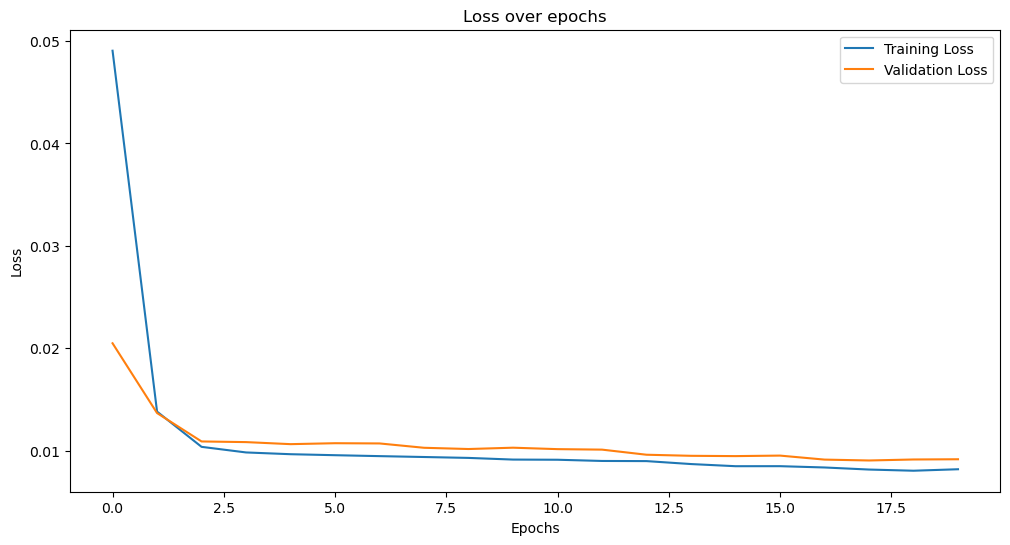

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0122 
Test Loss: 0.009172695688903332
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step
Mean Absolute Percentage Error (MAPE): 47.15%


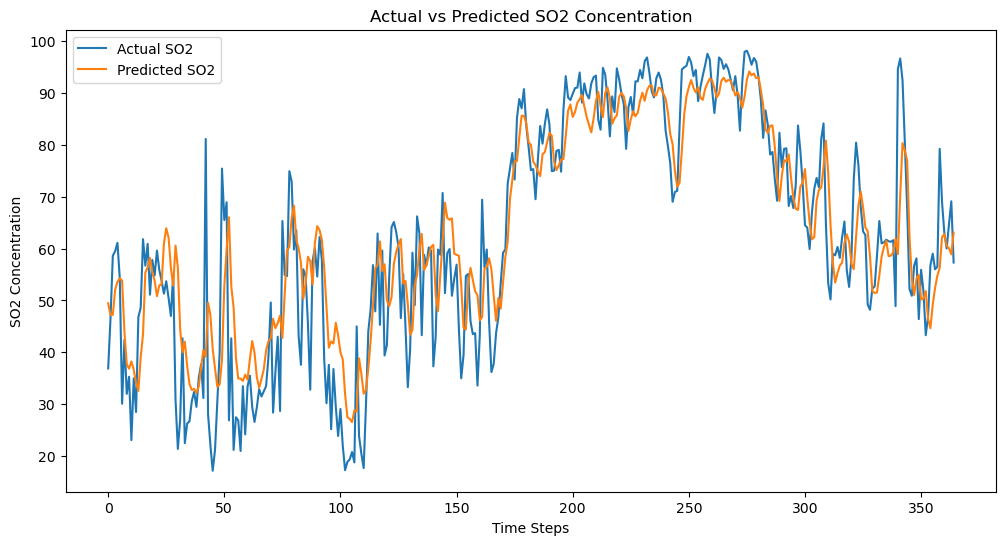

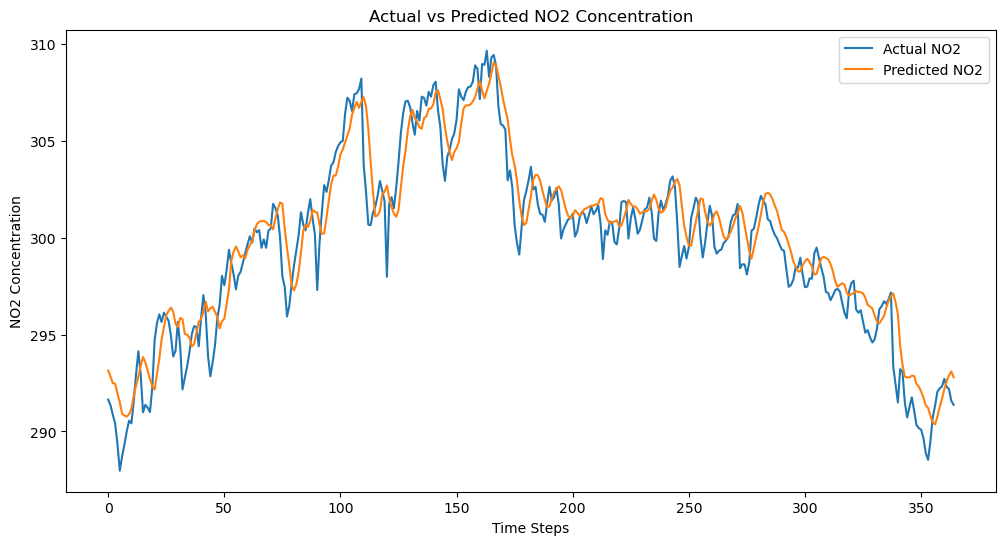

In [39]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Load your data
data = pd.read_csv('updateddata.csv')

# Assume your data has columns: 'date', 'humidity', 'temperature', 'so2_concentration'
# Preprocess the data (e.g., normalize the features)
scaler = MinMaxScaler()
data[['Humidity', 'Temperature', 'SO2', 'NO2']] = scaler.fit_transform(data[['Humidity', 'Temperature', 'SO2', 'NO2']])

# Optionally, convert date to datetime format if not already
data['Date'] = pd.to_datetime(data['Date'])

# Function to create sequences
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

# Define sequence length (5 days for training, 6th day for label)
seq_length = 5

# Create sequences (assuming 'humidity', 'temperature', 'so2_concentration' are in columns 1, 2, 3)
features = data[['Humidity', 'Temperature', 'SO2', 'NO2']].values
X, y = create_sequences(features, seq_length)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Define the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(seq_length, X_train.shape[2])))
model.add(LSTM(units=50))
model.add(Dense(units=X_train.shape[2]))  # Output layer with the same number of features

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Plot the training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

# Make predictions
predictions = model.predict(X_test)

# Inverse transform the predictions and the actual values if you used a scaler
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(y_test)

# Calculate mean absolute percentage error (MAPE)
mape = np.mean(np.abs((y_test - predictions) / y_test)) * 100
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')

# Plot the predicted vs actual values
plt.figure(figsize=(12, 6))
plt.plot(y_test[:, 0], label='Actual SO2')
plt.plot(predictions[:, 0], label='Predicted SO2')
plt.title('Actual vs Predicted SO2 Concentration')
plt.xlabel('Time Steps')
plt.ylabel('SO2 Concentration')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(y_test[:, 1], label='Actual NO2')
plt.plot(predictions[:, 1], label='Predicted NO2')
plt.title('Actual vs Predicted NO2 Concentration')
plt.xlabel('Time Steps')
plt.ylabel('NO2 Concentration')
plt.legend()
plt.show()


Epoch 1/20


C:\Users\kumar\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.1583 - val_loss: 0.0205
Epoch 2/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0149 - val_loss: 0.0127
Epoch 3/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0120 - val_loss: 0.0116
Epoch 4/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0114 - val_loss: 0.0114
Epoch 5/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0106 - val_loss: 0.0113
Epoch 6/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0107 - val_loss: 0.0112
Epoch 7/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0110 - val_loss: 0.0115
Epoch 8/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0107 - val_loss: 0.0107
Epoch 9/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0102 - val_loss: 0.0106
Epoch 10/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0098 - val_loss: 0.0103
Epoch 11/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0100 - val_loss: 0.0102
Epoch 12/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0100 - val_loss: 0.0104

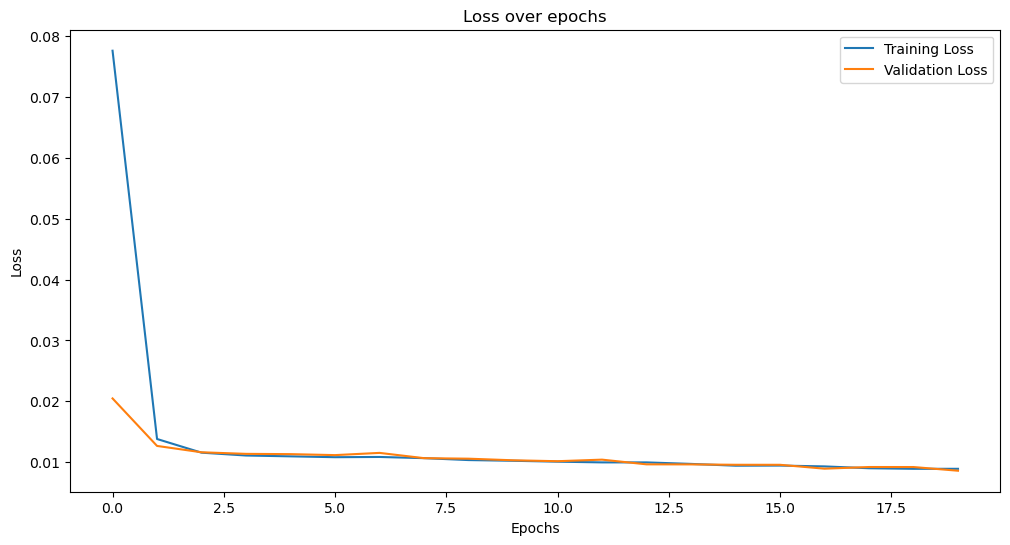

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0106 
Test Loss: 0.00860021822154522
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step
Mean Absolute Percentage Error (MAPE): 50.82%


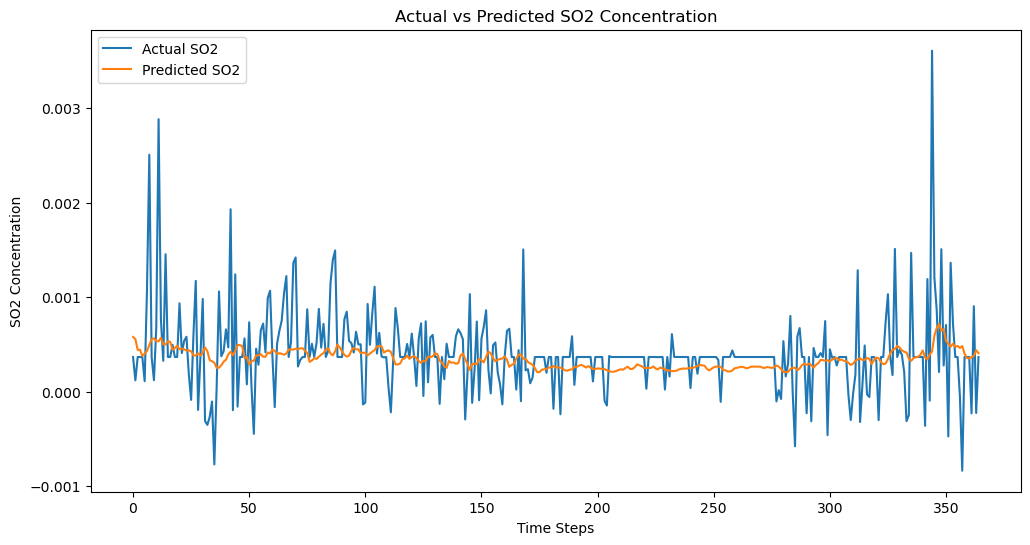

IndexError: index 3 is out of bounds for axis 1 with size 3

<Figure size 1200x600 with 0 Axes>

In [41]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Load your data
data = pd.read_csv('updateddata.csv')

# Assume your data has columns: 'date', 'humidity', 'temperature', 'so2_concentration', 'no2_concentration'
# Preprocess the data (e.g., normalize the features)
scaler = MinMaxScaler()
data[['Humidity', 'Temperature', 'SO2']] = scaler.fit_transform(data[['Humidity', 'Temperature', 'SO2']])

# Optionally, convert date to datetime format if not already
data['Date'] = pd.to_datetime(data['Date'])

# Function to create sequences
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

# Define sequence length (5 days for training, 6th day for label)
seq_length = 5

# Create sequences (assuming 'humidity', 'temperature', 'so2_concentration', 'no2_concentration' are in the columns)
features = data[['Humidity', 'Temperature', 'SO2']].values
X, y = create_sequences(features, seq_length)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Define the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(seq_length, X_train.shape[2])))
model.add(LSTM(units=50))
model.add(Dense(units=X_train.shape[2]))  # Output layer with the same number of features

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Plot the training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

# Make predictions
predictions = model.predict(X_test)

# Inverse transform the predictions and the actual values if you used a scaler
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(y_test)

# Calculate mean absolute percentage error (MAPE)
mape = np.mean(np.abs((y_test - predictions) / y_test)) * 100
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')

# Plot the predicted vs actual values
plt.figure(figsize=(12, 6))
plt.plot(y_test[:, 2], label='Actual SO2')
plt.plot(predictions[:, 2], label='Predicted SO2')
plt.title('Actual vs Predicted SO2 Concentration')
plt.xlabel('Time Steps')
plt.ylabel('SO2 Concentration')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(y_test[:, 3], label='Actual NO2')
plt.plot(predictions[:, 3], label='Predicted NO2')
plt.title('Actual vs Predicted NO2 Concentration')
plt.xlabel('Time Steps')
plt.ylabel('NO2 Concentration')
plt.legend()
plt.show()


In [46]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Load your data
data = pd.read_csv('updateddata.csv')

# Assume your data has columns: 'date', 'humidity', 'temperature', 'so2_concentration', 'no2_concentration'
# Preprocess the data (e.g., normalize the features)
scaler = MinMaxScaler()
data['Humidity','Temperature', 'SO2','NO2'] = scaler.fit_transform(data['Humidity', 'Temperature', 'SO2','NO2'])

# Optionally, convert date to datetime format if not already
data['Date'] = pd.to_datetime(data['Date'])

# Function to create sequences
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

# Define sequence length (5 days for training, 6th day for label)
seq_length = 5

# Create sequences (assuming 'humidity', 'temperature', 'so2_concentration', 'no2_concentration' are in the columns)
features = data[['Humidity', 'Temperature', 'SO2','NO2']].values
X, y = create_sequences(features, seq_length)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Define the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(seq_length, X_train.shape[2])))
model.add(LSTM(units=50))
model.add(Dense(units=X_train.shape[2]))  # Output layer with the same number of features

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Plot the training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

# Make predictions
predictions = model.predict(X_test)

# Inverse transform the predictions and the actual values if you used a scaler
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(y_test)

# Calculate mean absolute percentage error (MAPE)
mape = np.mean(np.abs((y_test - predictions) / y_test)) * 100
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')

# Plot the predicted vs actual values for SO2 concentration
plt.figure(figsize=(12, 6))
plt.plot(y_test[:, 2], label='Actual SO2')
plt.plot(predictions[:, 2], label='Predicted SO2')
plt.title('Actual vs Predicted SO2 Concentration')
plt.xlabel('Time Steps')
plt.ylabel('SO2 Concentration')
plt.legend()
plt.show()

# Plot the predicted vs actual values for NO2 concentration
plt.figure(figsize=(12, 6))
plt.plot(y_test[:, 3], label='Actual NO2')
plt.plot(predictions[:, 3], label='Predicted NO2')
plt.title('Actual vs Predicted NO2 Concentration')
plt.xlabel('Time Steps')
plt.ylabel('NO2 Concentration')
plt.legend()
plt.show()


KeyError: ('Humidity', 'Temperature', 'SO2', 'NO2')

Epoch 1/20


C:\Users\kumar\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.1131 - val_loss: 0.0179
Epoch 2/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0137 - val_loss: 0.0122
Epoch 3/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0111 - val_loss: 0.0111
Epoch 4/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0098 - val_loss: 0.0106
Epoch 5/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0100 - val_loss: 0.0105
Epoch 6/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0097 - val_loss: 0.0106
Epoch 7/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0091 - val_loss: 0.0103
Epoch 8/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0093 - val_loss: 0.0105
Epoch 9/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0094 - val_loss: 0.0101
Epoch 10/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0092 - val_loss: 0.0100
Epoch 11/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0090 - val_loss: 0.0100
Epoch 12/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0093 - val_loss: 0.0097

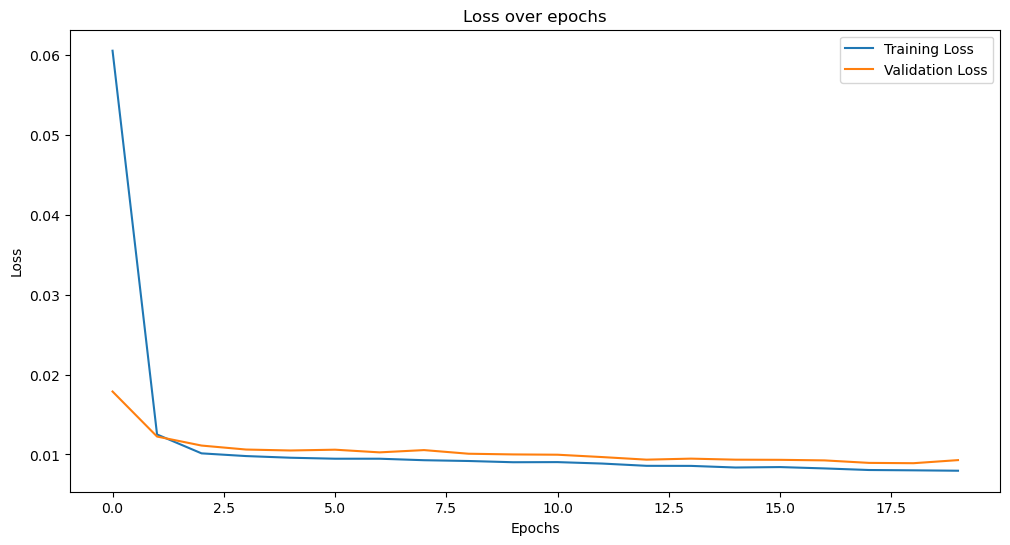

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0122 
Test Loss: 0.00929257646203041
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step
Mean Absolute Percentage Error (MAPE): 44.21%


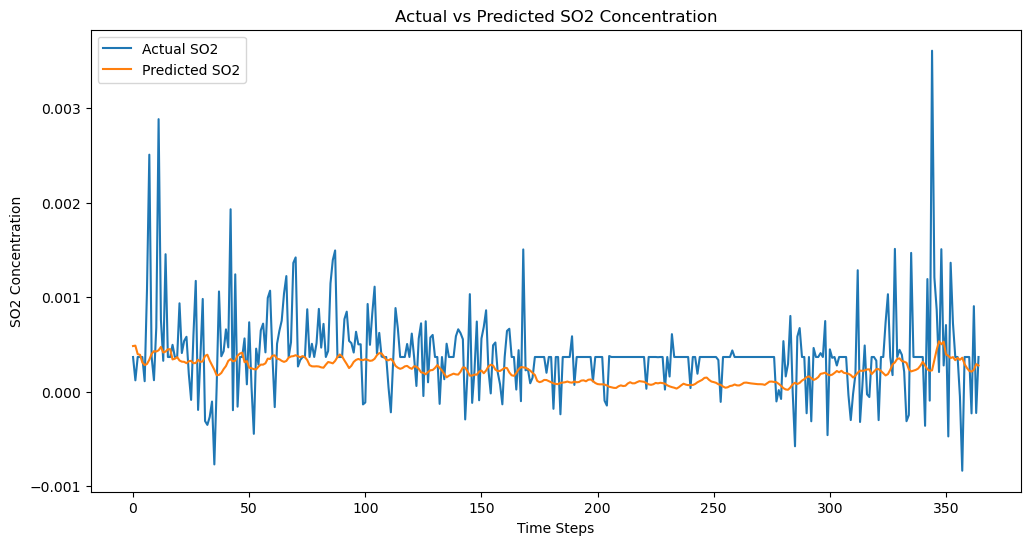

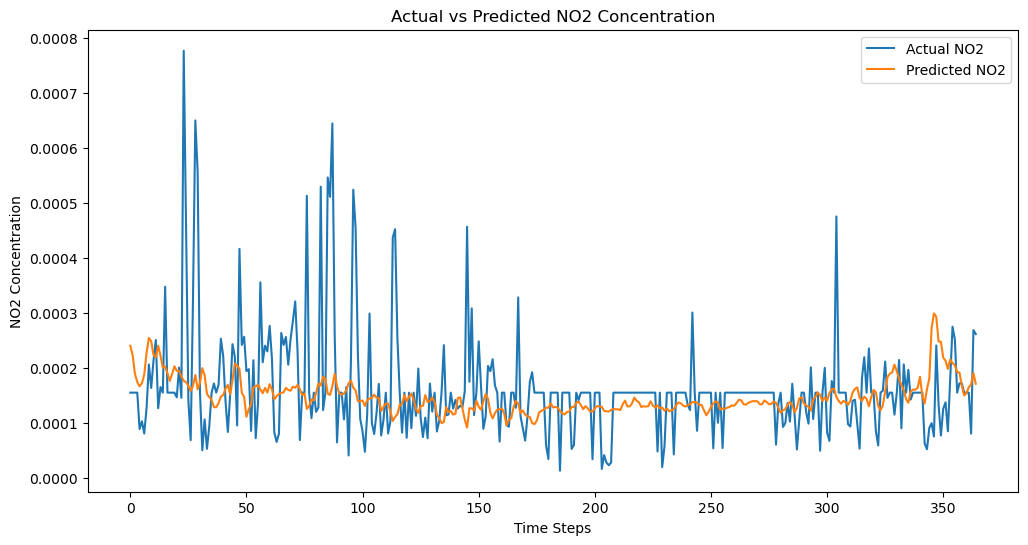

In [47]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Load your data
data = pd.read_csv('updateddata.csv')

# Preprocess the data (e.g., normalize the features)
scaler = MinMaxScaler()
data[['Humidity', 'Temperature', 'SO2', 'NO2']] = scaler.fit_transform(data[['Humidity', 'Temperature', 'SO2', 'NO2']])

# Optionally, convert date to datetime format if not already
data['Date'] = pd.to_datetime(data['Date'])

# Function to create sequences
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data) - seq_length):
        X.append(data[['Humidity', 'Temperature', 'SO2', 'NO2']].values[i:i+seq_length])
        y.append(data[['Humidity', 'Temperature', 'SO2', 'NO2']].values[i+seq_length])
    return np.array(X), np.array(y)

# Define sequence length (5 days for training, 6th day for label)
seq_length = 5

# Create sequences
X, y = create_sequences(data, seq_length)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Define the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(seq_length, X_train.shape[2])))
model.add(LSTM(units=50))
model.add(Dense(units=X_train.shape[2]))  # Output layer with the same number of features

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Plot the training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

# Make predictions
predictions = model.predict(X_test)

# Inverse transform the predictions and the actual values if you used a scaler
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(y_test)

# Calculate mean absolute percentage error (MAPE)
mape = np.mean(np.abs((y_test - predictions) / y_test)) * 100
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')

# Plot the predicted vs actual values
plt.figure(figsize=(12, 6))
plt.plot(y_test[:, 2], label='Actual SO2')
plt.plot(predictions[:, 2], label='Predicted SO2')
plt.title('Actual vs Predicted SO2 Concentration')
plt.xlabel('Time Steps')
plt.ylabel('SO2 Concentration')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(y_test[:, 3], label='Actual NO2')
plt.plot(predictions[:, 3], label='Predicted NO2')
plt.title('Actual vs Predicted NO2 Concentration')
plt.xlabel('Time Steps')
plt.ylabel('NO2 Concentration')
plt.legend()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Load your data
data = pd.read_csv('updateddata.csv')

# Preprocess the data (e.g., normalize the features)
scaler = MinMaxScaler()
data[['Humidity', 'Temperature', 'SO2', 'NO2']] = scaler.fit_transform(data[['Humidity', 'Temperature', 'SO2', 'NO2']])

# Optionally, convert date to datetime format if not already
data['Date'] = pd.to_datetime(data['Date'])

# Function to create sequences
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data) - seq_length):
        X.append(data[['Humidity', 'Temperature', 'SO2', 'NO2']].values[i:i+seq_length])
        y.append(data[['Humidity', 'Temperature', 'SO2', 'NO2']].values[i+seq_length])
    return np.array(X), np.array(y)

# Define sequence length (5 days for training, 6th day for label)
seq_length = 5

# Create sequences
X, y = create_sequences(data, seq_length)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Define the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(seq_length, X_train.shape[2])))
model.add(LSTM(units=50))
model.add(Dense(units=X_train.shape[2]))  # Output layer with the same number of features

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Plot the training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Make predictions
predictions = model.predict(X_test)

# Inverse transform the predictions and the actual values if you used a scaler
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(y_test)

# Plot the predicted vs actual values
plt.figure(figsize=(12, 6))
plt.plot(y_test[:, 2], label='Actual SO2')
plt.plot(predictions[:, 2], label='Predicted SO2')
plt.title('Actual vs Predicted SO2 Concentration')
plt.xlabel('Time Steps')
plt.ylabel('SO2 Concentration')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(y_test[:, 3], label='Actual NO2')
plt.plot(predictions[:, 3], label='Predicted NO2')
plt.title('Actual vs Predicted NO2 Concentration')
plt.xlabel('Time Steps')
plt.ylabel('NO2 Concentration')
plt.legend()
plt.show()


In [48]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, r2_score

# Define feature and target variables
X = data[['Temperature', 'Humidity']]
y_NO2 = data['NO2']
y_SO2 = data['SO2']

# Split the data into training and testing sets
X_train, X_test, y_NO2_train, y_NO2_test = train_test_split(X, y_NO2, test_size=0.2, random_state=42)
_, _, y_SO2_train, y_SO2_test = train_test_split(X, y_SO2, test_size=0.2, random_state=42)

# Train Elastic Net model for NO2
model_NO2 = ElasticNet(random_state=42)
model_NO2.fit(X_train, y_NO2_train)

# Predict NO2
y_NO2_pred = model_NO2.predict(X_test)

# Evaluate NO2 model
mse_NO2 = mean_squared_error(y_NO2_test, y_NO2_pred)
r2_NO2 = r2_score(y_NO2_test, y_NO2_pred)
print(f'NO2 Model - MSE: {mse_NO2}, R2: {r2_NO2}')

# Train Elastic Net model for SO2
model_SO2 = ElasticNet(random_state=42)
model_SO2.fit(X_train, y_SO2_train)

# Predict SO2
y_SO2_pred = model_SO2.predict(X_test)

# Evaluate SO2 model
mse_SO2 = mean_squared_error(y_SO2_test, y_SO2_pred)
r2_SO2 = r2_score(y_SO2_test, y_SO2_pred)
print(f'SO2 Model - MSE: {mse_SO2}, R2: {r2_SO2}')


NO2 Model - MSE: 0.00783153083710389, R2: -0.0031570558976103946
SO2 Model - MSE: 0.010965988148676374, R2: -0.01365965427665028


In [49]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score

# Define feature and target variables
X = data[['Temperature', 'Humidity']]
y_NO2 = data['NO2']
y_SO2 = data['SO2']

# Split the data into training and testing sets
X_train, X_test, y_NO2_train, y_NO2_test = train_test_split(X, y_NO2, test_size=0.2, random_state=42)
_, _, y_SO2_train, y_SO2_test = train_test_split(X, y_SO2, test_size=0.2, random_state=42)

# Define the degree of the polynomial
degree = 2

# Create a polynomial regression model for NO2
polyreg_NO2 = make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg_NO2.fit(X_train, y_NO2_train)

# Predict NO2
y_NO2_pred = polyreg_NO2.predict(X_test)

# Evaluate NO2 model
mse_NO2 = mean_squared_error(y_NO2_test, y_NO2_pred)
r2_NO2 = r2_score(y_NO2_test, y_NO2_pred)
print(f'NO2 Model - MSE: {mse_NO2}, R2: {r2_NO2}')

# Create a polynomial regression model for SO2
polyreg_SO2 = make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg_SO2.fit(X_train, y_SO2_train)

# Predict SO2
y_SO2_pred = polyreg_SO2.predict(X_test)

# Evaluate SO2 model
mse_SO2 = mean_squared_error(y_SO2_test, y_SO2_pred)
r2_SO2 = r2_score(y_SO2_test, y_SO2_pred)
print(f'SO2 Model - MSE: {mse_SO2}, R2: {r2_SO2}')


NO2 Model - MSE: 0.006935265921570896, R2: 0.11164737923411461
SO2 Model - MSE: 0.010320643434822089, R2: 0.04599387540674249


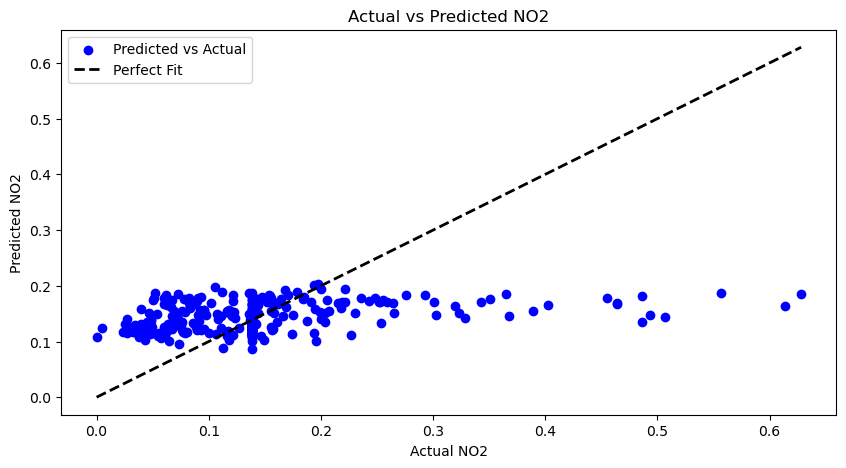

In [50]:
# Plot NO2 predictions vs actual values
plt.figure(figsize=(10, 5))
plt.scatter(y_NO2_test, y_NO2_pred, color='blue', label='Predicted vs Actual')
plt.plot([y_NO2_test.min(), y_NO2_test.max()], [y_NO2_test.min(), y_NO2_test.max()], 'k--', lw=2, label='Perfect Fit')
plt.xlabel('Actual NO2')
plt.ylabel('Predicted NO2')
plt.title('Actual vs Predicted NO2')
plt.legend()
plt.show()

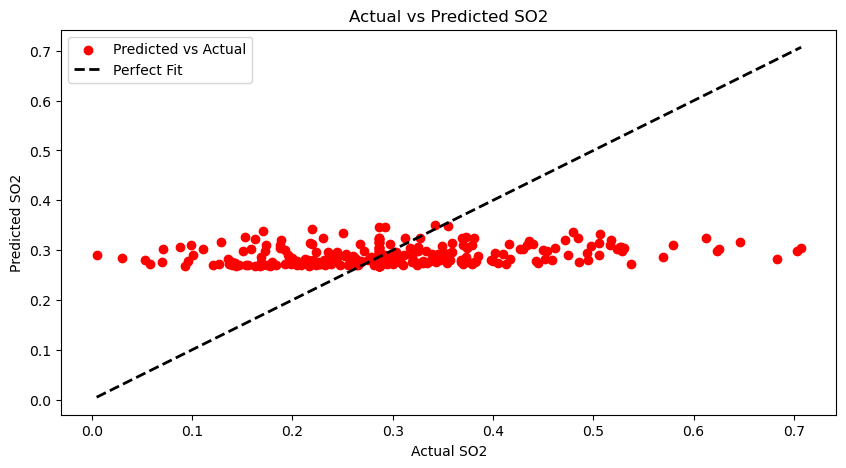

In [51]:
# Plot SO2 predictions vs actual values
plt.figure(figsize=(10, 5))
plt.scatter(y_SO2_test, y_SO2_pred, color='red', label='Predicted vs Actual')
plt.plot([y_SO2_test.min(), y_SO2_test.max()], [y_SO2_test.min(), y_SO2_test.max()], 'k--', lw=2, label='Perfect Fit')
plt.xlabel('Actual SO2')
plt.ylabel('Predicted SO2')
plt.title('Actual vs Predicted SO2')
plt.legend()
plt.show()

In [ ]:
.3